
# SVG filter pie

Demonstrate SVG filtering effects which might be used with Matplotlib.
The pie chart drawing code is borrowed from pie_demo.py

Note that the filtering effects are only effective if your SVG renderer
support it.


Saving 'svg_filter_pie.svg'


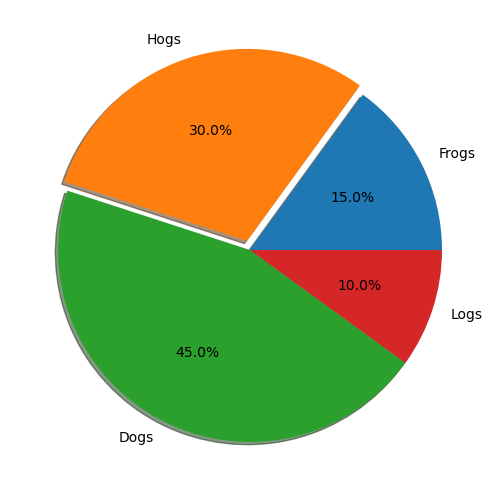

In [6]:
import io
import xml.etree.ElementTree as ET

import matplotlib.pyplot as plt

from matplotlib.patches import Shadow

# make a square figure and Axes
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# We want to draw the shadow for each pie, but we will not use "shadow"
# option as it doesn't save the references to the shadow patches.
pies = ax.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%')

for w in pies[0]:
    # set the id with the label.
    w.set_gid(w.get_label())

    # we don't want to draw the edge of the pie
    w.set_edgecolor("none")

for w in pies[0]:
    # create shadow patch
    s = Shadow(w, -0.01, -0.01)
    s.set_gid(w.get_gid() + "_shadow")
    s.set_zorder(w.get_zorder() - 0.1)
    ax.add_patch(s)


# save
f = io.BytesIO()
plt.savefig(f, format="svg")


# Filter definition for shadow using a gaussian blur and lighting effect.
# The lighting filter is copied from http://www.w3.org/TR/SVG/filters.html

# I tested it with Inkscape and Firefox3. "Gaussian blur" is supported
# in both, but the lighting effect only in Inkscape. Also note
# that, Inkscape's exporting also may not support it.

filter_def = """
  <defs xmlns='http://www.w3.org/2000/svg'
        xmlns:xlink='http://www.w3.org/1999/xlink'>
    <filter id='dropshadow' height='1.2' width='1.2'>
      <feGaussianBlur result='blur' stdDeviation='2'/>
    </filter>

    <filter id='MyFilter' filterUnits='objectBoundingBox'
            x='0' y='0' width='1' height='1'>
      <feGaussianBlur in='SourceAlpha' stdDeviation='4%' result='blur'/>
      <feOffset in='blur' dx='4%' dy='4%' result='offsetBlur'/>
      <feSpecularLighting in='blur' surfaceScale='5' specularConstant='.75'
           specularExponent='20' lighting-color='#bbbbbb' result='specOut'>
        <fePointLight x='-5000%' y='-10000%' z='20000%'/>
      </feSpecularLighting>
      <feComposite in='specOut' in2='SourceAlpha'
                   operator='in' result='specOut'/>
      <feComposite in='SourceGraphic' in2='specOut' operator='arithmetic'
    k1='0' k2='1' k3='1' k4='0'/>
    </filter>
  </defs>
"""


tree, xmlid = ET.XMLID(f.getvalue())

# insert the filter definition in the svg dom tree.
tree.insert(0, ET.XML(filter_def))

# for i, pie_name in enumerate(labels):
#     pie = xmlid[pie_name]
#     pie.set("filter", 'url(#MyFilter)')

#     shadow = xmlid[pie_name + "_shadow"]
#     shadow.set("filter", 'url(#dropshadow)')

fn = "svg_filter_pie.svg"
print(f"Saving '{fn}'")
ET.ElementTree(tree).write(fn)

In [2]:
pies

([<matplotlib.patches.Wedge at 0x78a778489e80>,
 [Text(0.980107155175532, 0.4993895917755252, 'Frogs'),
  Text(-0.3553697312815348, 1.0937149327356237, 'Hogs'),
  Text(-0.4993892587836722, -0.9801073248433024, 'Dogs'),
  Text(1.0461621838648125, -0.339918644753721, 'Logs')],
 [Text(0.5346039028230174, 0.2723943227866501, '15.0%'),
  Text(-0.20086115246347622, 0.6181867011114394, '30.0%'),
  Text(-0.27239414115473026, -0.534603995369074, '45.0%'),
  Text(0.5706339184717159, -0.185410169865666, '10.0%')])